In [1]:
import pandas as pd

# Read motor dataset
motor_df = pd.read_csv('Motor_dataset_cleaned.csv')
motor_df

,current_1_lebelling,current_2_lebelling,current_3_lebelling,temperature,speed,vibration,system_condition
0,1,1,2,2,1,1,pre_failure
1,2,1,1,2,1,2,pre_failure
2,1,2,1,2,1,3,failure
3,1,1,1,1,1,1,normal
4,1,1,1,1,1,1,normal
...,...,...,...,...,...,...,...
1004,1,3,3,3,3,3,failure
1005,2,2,2,2,2,1,pre_failure
1006,1,1,1,1,1,1,normal
1007,3,3,3,3,3,3,failure


In [2]:
# Encode the categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
motor_df['system_condition'] = labelencoder.fit_transform(motor_df['system_condition'])
motor_df

,current_1_lebelling,current_2_lebelling,current_3_lebelling,temperature,speed,vibration,system_condition
0,1,1,2,2,1,1,2
1,2,1,1,2,1,2,2
2,1,2,1,2,1,3,0
3,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
1004,1,3,3,3,3,3,0
1005,2,2,2,2,2,1,2
1006,1,1,1,1,1,1,1
1007,3,3,3,3,3,3,0


1009


,current_1_lebelling,current_2_lebelling,current_3_lebelling,temperature,speed,vibration,system_condition
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,1.256690,1.228940,1.199207,1.698712,1.646184,1.664024,0.790882
std,0.496533,0.463033,0.426037,0.832385,0.802209,0.822009,0.937996
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000


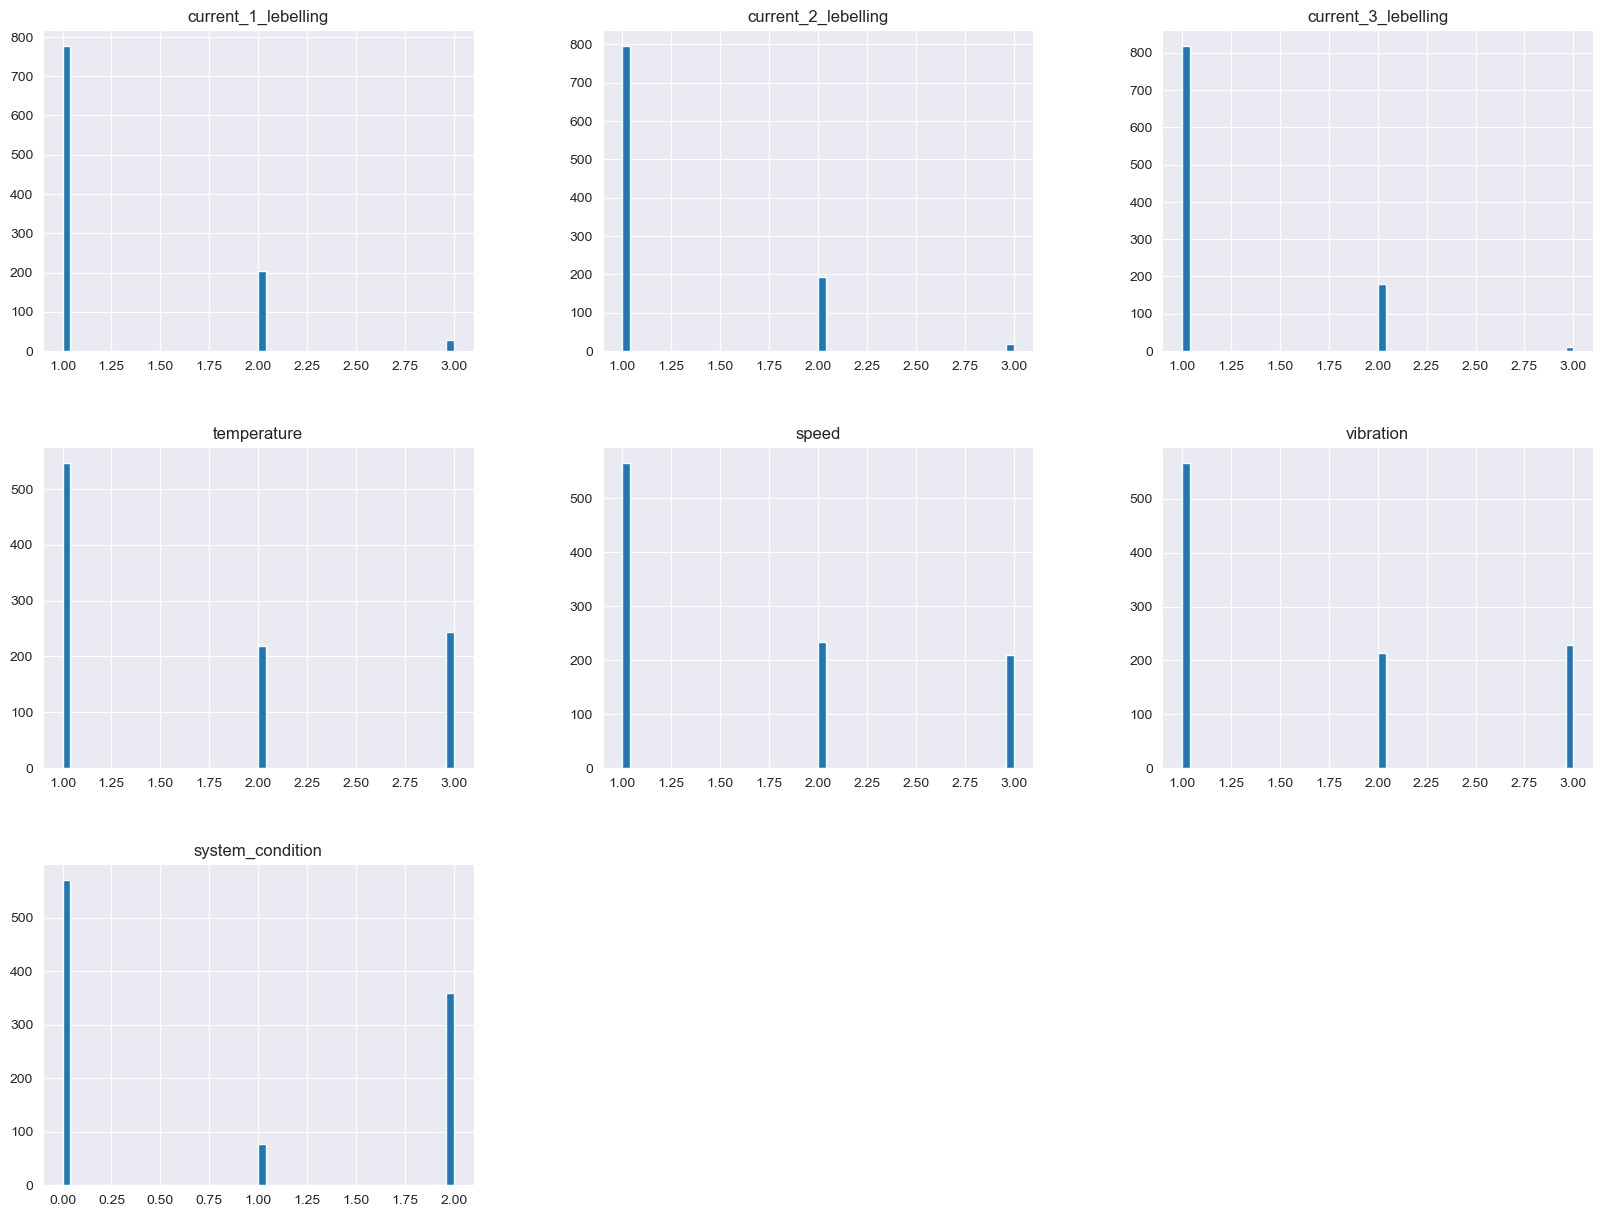

In [3]:
print(len(motor_df))
# Analyze the dataset
display(motor_df.describe())
# Plot the dataset distribution
import matplotlib.pyplot as plt
motor_df.hist(bins=50, figsize=(20,15))
plt.show()



In [4]:
# Do data analysis on the dataset and apply feature engineering
# Check for the missing values
motor_df.isnull().sum()


current_1_lebelling    0
current_2_lebelling    0
current_3_lebelling    0
temperature            0
speed                  0
vibration              0
system_condition       0
dtype: int64

,current_1_lebelling,current_2_lebelling,current_3_lebelling,temperature,speed,vibration,system_condition
current_1_lebelling,1.000000,0.080710,0.081626,0.048087,0.076308,0.004905,-0.086988
current_2_lebelling,0.080710,1.000000,0.115582,0.055592,-0.019413,0.058933,-0.051836
current_3_lebelling,0.081626,0.115582,1.000000,0.018349,0.003242,0.041164,0.012494
temperature,0.048087,0.055592,0.018349,1.000000,-0.188029,-0.120540,-0.322192
speed,0.076308,-0.019413,0.003242,-0.188029,1.000000,-0.123279,-0.297506
vibration,0.004905,0.058933,0.041164,-0.120540,-0.123279,1.000000,-0.336963
system_condition,-0.086988,-0.051836,0.012494,-0.322192,-0.297506,-0.336963,1.000000


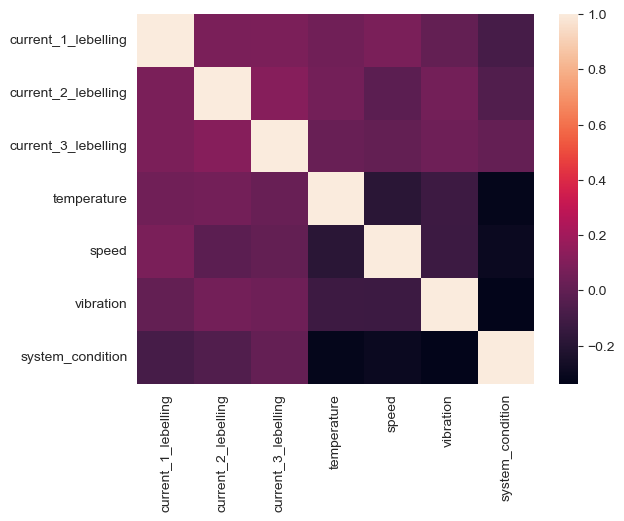

In [5]:
# Plot the correlation matrix
import seaborn as sns   
corr = motor_df.corr()
display(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [6]:
from sklearn.model_selection import learning_curve
# Function that tries different classifiers and returns the best one
def train_different_classifiers(model,model_name):
    # Get the learning curve data
    train_sizes, train_scores, valid_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))
    
    # Calculate the mean and standard deviation of the training scores
    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    
    # Calculate the mean and standard deviation of the validation scores
    valid_scores_mean = -np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)
    
    # Plot the mean training and validation scores
    plt.plot(train_sizes, train_scores_mean, label='Training error')
    plt.plot(train_sizes, valid_scores_mean, label='Validation error')
    
    # Plot the standard deviation as a shaded area
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
    
    # Add labels, title and legend to the plot
    plt.ylabel('MSE', fontsize=14)
    plt.xlabel('Training set size', fontsize=14)
    plt.title(f'Learning curves for {model_name}', fontsize=18, y=1.03)
    plt.legend()
    # Show the plot
    plt.show()
    model_predic= model.predict(X_test)
    model_acc = accuracy_score(y_test, model_predic)
    print(f"{model_name} Accuracy: ", model_acc)
    sns.heatmap(confusion_matrix(y_test, model_predic), annot=True, cmap="YlGnBu")
    plt.show()
    print(confusion_matrix(y_test, model_predic))
    print(classification_report(y_test, model_predic))
   
    
    
    


SVM Accuracy:  0.9653465346534653
Random Forest Accuracy:  0.9554455445544554
Decision Tree Accuracy:  0.9603960396039604
Logistic Regression Accuracy:  0.8811881188118812
KNN Accuracy:  0.9356435643564357
Best model:  SVM


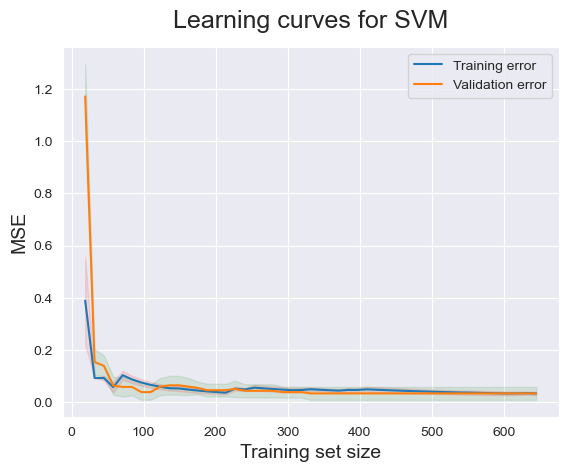

SVM Accuracy:  0.9653465346534653


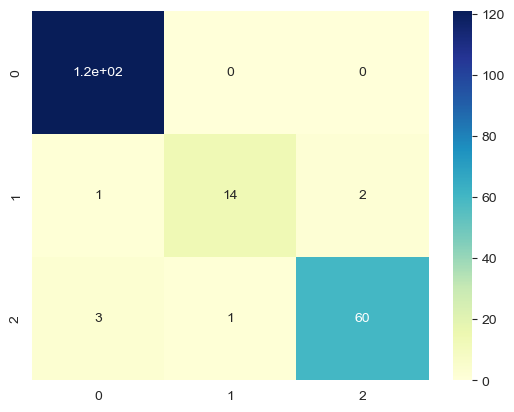

[[121   0   0]
 [  1  14   2]
 [  3   1  60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       121
           1       0.93      0.82      0.87        17
           2       0.97      0.94      0.95        64

    accuracy                           0.97       202
   macro avg       0.96      0.92      0.94       202
weighted avg       0.97      0.97      0.96       202


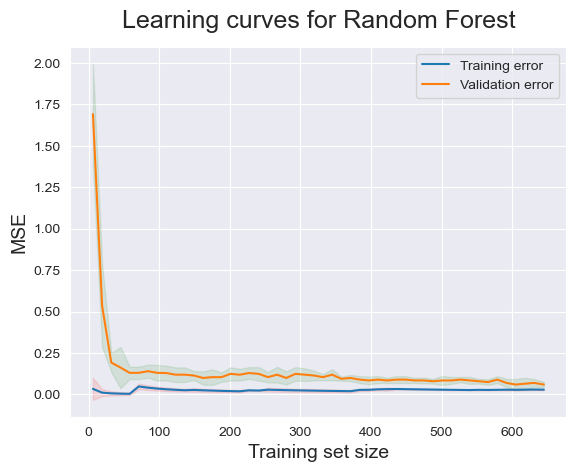

Random Forest Accuracy:  0.9554455445544554


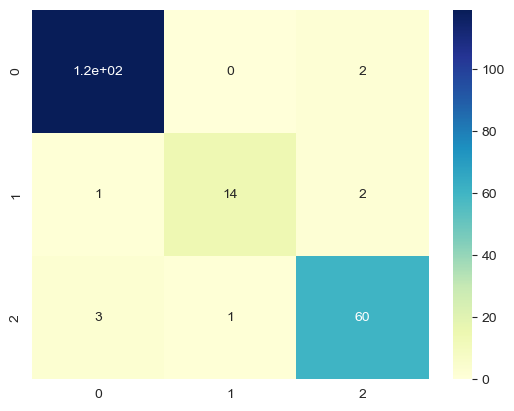

[[119   0   2]
 [  1  14   2]
 [  3   1  60]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       121
           1       0.93      0.82      0.87        17
           2       0.94      0.94      0.94        64

    accuracy                           0.96       202
   macro avg       0.95      0.91      0.93       202
weighted avg       0.96      0.96      0.95       202


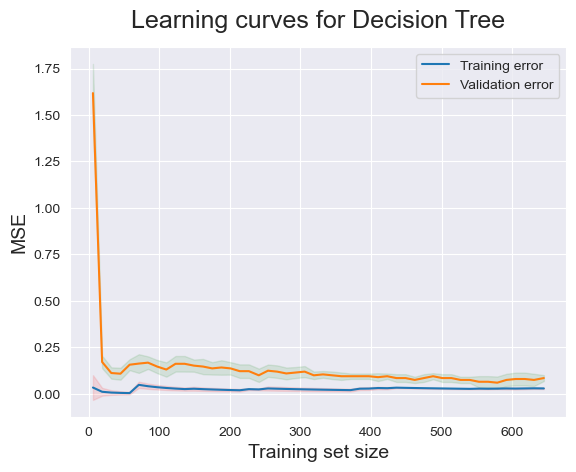

Decision Tree Accuracy:  0.9603960396039604


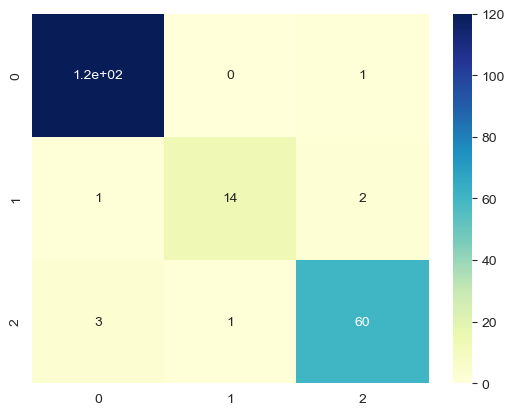

[[120   0   1]
 [  1  14   2]
 [  3   1  60]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       121
           1       0.93      0.82      0.87        17
           2       0.95      0.94      0.94        64

    accuracy                           0.96       202
   macro avg       0.95      0.92      0.93       202
weighted avg       0.96      0.96      0.96       202


/Users/claudekwizera/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


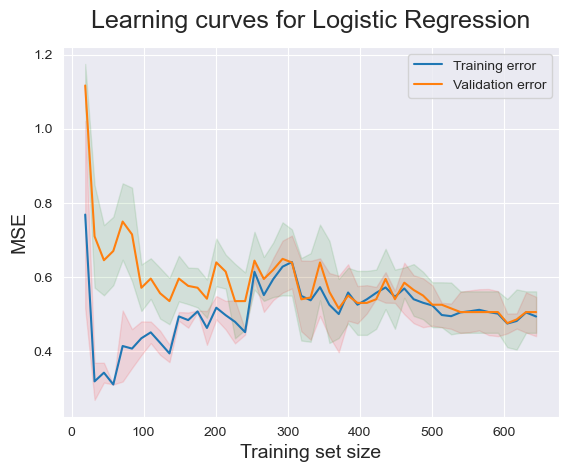

Logistic Regression Accuracy:  0.8811881188118812


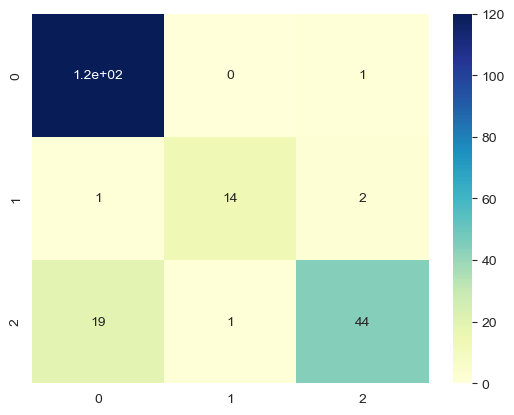

[[120   0   1]
 [  1  14   2]
 [ 19   1  44]]
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       121
           1       0.93      0.82      0.87        17
           2       0.94      0.69      0.79        64

    accuracy                           0.88       202
   macro avg       0.91      0.83      0.86       202
weighted avg       0.89      0.88      0.88       202


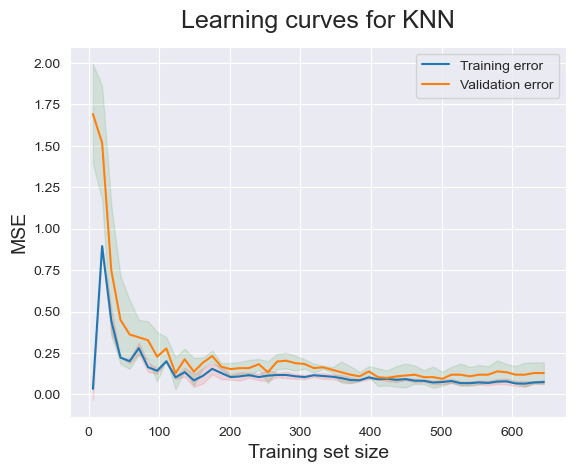

KNN Accuracy:  0.9356435643564357


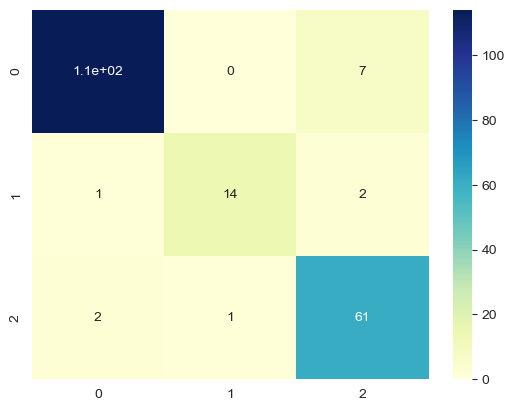

[[114   0   7]
 [  1  14   2]
 [  2   1  61]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       121
           1       0.93      0.82      0.87        17
           2       0.87      0.95      0.91        64

    accuracy                           0.94       202
   macro avg       0.93      0.91      0.91       202
weighted avg       0.94      0.94      0.94       202


In [7]:
import numpy as np
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
X = motor_df.drop('system_condition', axis=1)
y = motor_df['system_condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Train classifiers using the training set

# Train the SVM classifier
svc = SVC()
svc.fit(X_train, y_train)
svm_predict= svc.predict(X_test)
# Train the Random Forest classifier 
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_predict= rfc.predict(X_test)


# Train the Decision Tree classifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_predict= dtree.predict(X_test)

# Train the Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logmodel_predict= logmodel.predict(X_test)

# Train the KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_predict= knn.predict(X_test)

models = [svc, rfc, dtree, logmodel, knn]

# Identify the best classifier
model_preds = [svm_predict, rfc_predict, dtree_predict, logmodel_predict, knn_predict]
model_names = ["SVM", "Random Forest", "Decision Tree", "Logistic Regression", "KNN"]
best_model_name = None
best_acc = None
best_model = None
for model,model_pred, model_name in zip(models,model_preds, model_names):
    model_acc = accuracy_score(y_test, model_pred)
    print(f"{model_name} Accuracy: ", model_acc)
    if best_model_name is None:
        best_model_name = model_name
        best_acc = model_acc
        best_model = model
    elif model_acc > best_acc:
        best_model_name = model_name
        best_acc = model_acc
        best_model = model
print("Best model: ", best_model_name)

train_different_classifiers(svc,"SVM")
train_different_classifiers(rfc,"Random Forest")
train_different_classifiers(dtree,"Decision Tree")
train_different_classifiers(logmodel,"Logistic Regression")
train_different_classifiers(knn,"KNN")









In [8]:
from utils import make_recommendation

In [9]:

inputs = X_test[:3]
# Get list of inputs fro each row
model_pred_test = best_model.predict(inputs)
inputs = inputs.values.tolist()
# Decode the predicted values
make_recommendation(inputs,model_pred_test,labelencoder)

Motor status:  failure
Motor status:  pre_failure
Motor status:  failure


[{'status': 'failure',
  'problem': 'Unfixed bolt',
  'solution': 'Fix the bolts and check if the rotor is balanced. If the issue persists, check the bearing.'},
 {'status': 'pre_failure',
  'problem': 'Reduced efficiency',
  'solution': 'Check the bearing and the rotor. And be ready to do preventive maintenance.'},
 {'status': 'failure',
  'problem': 'Overloading',
  'solution': 'Reduce the load on the motor.'}]

In [10]:
# Save the model, make_recommendation function and the label encoder
import pickle
with open('saved_models/motor_recommendation.pkl', 'wb') as f:
    pickle.dump([best_model, make_recommendation, labelencoder], f)
print("Model saved successfully.")

Model saved successfully.


In [11]:
# Test the usage og saved model
import pickle
with open('saved_models/motor_recommendation.pkl', 'rb') as f:
    best_model, make_recommendation, labelencoder = pickle.load(f)
print("Model loaded successfully.")


Model loaded successfully.


In [13]:

inputs_test = X_test[:4]
# Get list of inputs fro each row
model_pred_test = best_model.predict(inputs_test)
inputs = inputs_test.values.tolist()
print(inputs)
# Decode the predicted values
recommendations = make_recommendation(inputs,model_pred_test,labelencoder)
print(recommendations)

[[1, 1, 1, 2, 1, 3], [1, 1, 1, 1, 2, 1], [1, 2, 1, 3, 2, 1], [1, 1, 1, 1, 3, 1]]
Motor status:  failure
Motor status:  pre_failure
Motor status:  failure
Motor status:  failure
Low speed detected. Please check if the motor is working on the rated speed
[{'status': 'failure', 'problem': 'Unfixed bolt', 'solution': 'Fix the bolts and check if the rotor is balanced. If the issue persists, check the bearing.'}, {'status': 'pre_failure', 'problem': 'Reduced efficiency', 'solution': 'Check the bearing and the rotor. And be ready to do preventive maintenance.'}, {'status': 'failure', 'problem': 'Overloading', 'solution': 'Reduce the load on the motor.'}, {'status': 'failure', 'problem': 'Low speed', 'solution': 'Reduce the load or check if the motor is stopped.'}]
